### Analysing the venn which has bad overlap with the logistic regression. 
We choosen protien HA and isotype IgM. below is the venn diagram 
<img src="Sig_peptide_venn_NoTransform_HA_IgM.jpg"/>
As we can see Rapa Live vs Rapa dead and live vs dead has bad overlap i.e. Fischer list has a long list of peptides compared to the intersection.
Let choose the the Rapa live vs Rapa dead to Analyse the issue.

Read in the data for significant peptide generated by the fischer method and draw box plot for the peptides (Rapa Live Vs Rapa Dead).

In [1]:
# import all the libraries need for the code
import Rapa_Tool as rt
import os 
import sys
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
from scipy.stats import shapiro
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [493]:
def drawBoxPlot(col_name_x,col_name_y,df):
    xaxis = df[col_name_y]
    yaxis = df[col_name_x]
    rt.pT.plot_boxplot(xaxis,yaxis)

In [476]:
def GLM_function(x,y):
    model = sm.GLM(endog=y.astype(float), exog=sm.add_constant(x.astype(float)),
                       family=sm.families.Binomial())
    res = model.fit()
    return res

In [477]:

def add_Gausian_noise_to_df(noise,df,col_name):
    
    d = df.copy()
    count = 0
    for idx in d.index:
        val = d.at[idx,col_name]
        if val == 20:
            d.at[idx,col_name]=val+noise[count]
            count +=1
    return d
        

In [675]:
def std_deviation(df):
    stdDev_dict ={}
    for col in df.columns:
        stdDev_dict.update({col:np.std(df[col])})
    return stdDev_dict
        

In [4]:
#read the files 
input_path = os.path.join(rt.ROOT,rt.PROJECT_PATH,rt.project_name,rt.DATA_SOURCE_FOLDER)
input_path= input_path+r"\Array_HA_IgM\\"
fischerFilename = "all_sig_4_comp_peptides_HA_IgM.xlsx"
arrayfilename = "array_data_RAPA3_HA_IgM.xlsx"
FischerSigDF = rt.readInputFiles(input_path,fischerFilename,None)
array_df = rt.readInputFiles(input_path,arrayfilename,None)
FischerSigDF.head()
path = r"D:\PhD-Tomer\Projects\Rapamycin\output\HA_IgM\19_06_2022\09_55_29\exp_NoCovariate"
logRegessionfilename = "All_sig_peptide_NoTransform.xlsx"
lgregressionSigDf= rt.readInputFiles(path,logRegessionfilename,None)
lgregressionSigDf
#get only the rows group name that match rapa live vs rapa dead 
FischerSigDF_filter = FischerSigDF.loc[(FischerSigDF["group_names"]=="Rapa_Live vs. Rapa_Dead")]
FischerSigDF_filter
lgregressionSigDf_RDead_Rlive = lgregressionSigDf.loc[(lgregressionSigDf["group_names"]=="Rapa_Live vs. Rapa_Dead")]
lgregressionSigDf_RDead_Rlive
#draw the box plots
anitgen_name_fisher = FischerSigDF_filter["Antigen"].to_numpy()
anitgen_name_fisher
antigen_name_logR = lgregressionSigDf_RDead_Rlive["Antigen"].to_numpy()
antigen_name_logR
array_df_filter = array_df[(array_df["group"]=="Rapa_Dead") | (array_df["group"]=="Rapa_Live")]
'''
for i in range(len(anitgen_name_fisher)):
    x= array_df_filter["group"]
    y = array_df_filter[anitgen_name[i]]
    rt.pT.plot_boxplot(x,y)'''

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
0,0,HA_Cal09_36,"a=1, b=9, c=5, d=3",0.042986,1.000000,0.167541,IgM,Rapa_Live vs. Rapa_Dead
1,1,HA_Cal09_51,"a=3, b=7, c=7, d=1",0.024818,1.000000,0.137880,IgM,Rapa_Live vs. Rapa_Dead
2,2,HA_Cal09_146,"a=3, b=7, c=8, d=0",0.004022,0.201106,0.050277,IgM,Rapa_Live vs. Rapa_Dead
3,3,HA_Cal09_216,"a=3, b=7, c=8, d=0",0.004022,0.201106,0.050277,IgM,Rapa_Live vs. Rapa_Dead
4,4,HA_Cal09_301,"a=3, b=7, c=7, d=1",0.024818,1.000000,0.137880,IgM,Rapa_Live vs. Rapa_Dead


,Antigen,p-value,group_names,Adjusted_pvalue
0,HA_X31_142,0.026381,Rapa_Live vs. Rapa_Dead,NaN
1,HA_X31_172,0.031263,Rapa_Live vs. Rapa_Dead,NaN
2,HA_X31_262,0.035387,Rapa_Live vs. Rapa_Dead,NaN
3,HA_X31_327,0.020593,Rapa_Live vs. Rapa_Dead,NaN
4,HA_X31_352,0.046022,Rapa_Live vs. Rapa_Dead,NaN
...,...,...,...,...
100,HA_Cal09_46,0.012191,Live vs. Dead,NaN
101,HA_Cal09_536,0.035972,Live vs. Dead,NaN
102,HA_Cal09_541,0.024711,Live vs. Dead,NaN
103,HA_Cal09_66,0.043592,Live vs. Dead,NaN


,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
0,0,HA_Cal09_36,"a=1, b=9, c=5, d=3",0.042986,1.000000,0.167541,IgM,Rapa_Live vs. Rapa_Dead
1,1,HA_Cal09_51,"a=3, b=7, c=7, d=1",0.024818,1.000000,0.137880,IgM,Rapa_Live vs. Rapa_Dead
2,2,HA_Cal09_146,"a=3, b=7, c=8, d=0",0.004022,0.201106,0.050277,IgM,Rapa_Live vs. Rapa_Dead
3,3,HA_Cal09_216,"a=3, b=7, c=8, d=0",0.004022,0.201106,0.050277,IgM,Rapa_Live vs. Rapa_Dead
4,4,HA_Cal09_301,"a=3, b=7, c=7, d=1",0.024818,1.000000,0.137880,IgM,Rapa_Live vs. Rapa_Dead
5,5,HA_Cal09_311,"a=1, b=9, c=7, d=1",0.002879,0.143974,0.050277,IgM,Rapa_Live vs. Rapa_Dead
6,6,HA_Cal09_326,"a=1, b=9, c=5, d=3",0.042986,1.000000,0.167541,IgM,Rapa_Live vs. Rapa_Dead
7,7,HA_Cal09_371,"a=1, b=9, c=5, d=3",0.042986,1.000000,0.167541,IgM,Rapa_Live vs. Rapa_Dead
8,8,HA_Cal09_396,"a=1, b=9, c=6, d=2",0.012821,0.641026,0.106838,IgM,Rapa_Live vs. Rapa_Dead
9,9,HA_Cal09_486,"a=1, b=9, c=6, d=2",0.012821,0.641026,0.106838,IgM,Rapa_Live vs. Rapa_Dead


,Antigen,p-value,group_names,Adjusted_pvalue
0,HA_X31_142,0.026381,Rapa_Live vs. Rapa_Dead,NaN
1,HA_X31_172,0.031263,Rapa_Live vs. Rapa_Dead,NaN
2,HA_X31_262,0.035387,Rapa_Live vs. Rapa_Dead,NaN
3,HA_X31_327,0.020593,Rapa_Live vs. Rapa_Dead,NaN
4,HA_X31_352,0.046022,Rapa_Live vs. Rapa_Dead,NaN
5,HA_X31_392,0.034381,Rapa_Live vs. Rapa_Dead,NaN
6,HA_X31_422,0.025416,Rapa_Live vs. Rapa_Dead,NaN
7,HA_Vie1203_121,0.014999,Rapa_Live vs. Rapa_Dead,NaN
8,HA_Vie1203_166,0.012261,Rapa_Live vs. Rapa_Dead,NaN
9,HA_Vie1203_221,0.038838,Rapa_Live vs. Rapa_Dead,NaN


array(['HA_Cal09_36', 'HA_Cal09_51', 'HA_Cal09_146', 'HA_Cal09_216',
       'HA_Cal09_301', 'HA_Cal09_311', 'HA_Cal09_326', 'HA_Cal09_371',
       'HA_Cal09_396', 'HA_Cal09_486', 'HA_Cal09_536', 'HA_Cal09_546',
       'HA_X31_222', 'HA_X31_262', 'HA_X31_277', 'HA_X31_332',
       'HA_X31_367', 'HA_X31_392', 'HA_X31_412', 'HA_X31_422',
       'HA_Vie1203_51', 'HA_Vie1203_121', 'HA_Vie1203_126',
       'HA_Vie1203_161', 'HA_Vie1203_166', 'HA_Vie1203_231',
       'HA_Vie1203_306', 'HA_Vie1203_311', 'HA_Vie1203_321',
       'HA_Vie1203_481'], dtype=object)

array(['HA_X31_142', 'HA_X31_172', 'HA_X31_262', 'HA_X31_327',
       'HA_X31_352', 'HA_X31_392', 'HA_X31_422', 'HA_Vie1203_121',
       'HA_Vie1203_166', 'HA_Vie1203_221', 'HA_Vie1203_306',
       'HA_Vie1203_321', 'HA_Vie1203_326', 'HA_Vie1203_331',
       'HA_Vie1203_526', 'HA_Vie1203_546', 'HA_Cal09_106', 'HA_Cal09_166',
       'HA_Cal09_216', 'HA_Cal09_241', 'HA_Cal09_296', 'HA_Cal09_301',
       'HA_Cal09_311', 'HA_Cal09_321', 'HA_Cal09_326', 'HA_Cal09_46',
       'HA_Cal09_51', 'HA_Cal09_526', 'HA_Cal09_536', 'HA_Cal09_541',
       'HA_Cal09_546'], dtype=object)

'\nfor i in range(len(anitgen_name_fisher)):\n    x= array_df_filter["group"]\n    y = array_df_filter[anitgen_name[i]]\n    rt.pT.plot_boxplot(x,y)'

Lets choose a peptide from the box plot which shows significant difference. For example peptide HA_X31_277 or HA_cal09_326
For HA_X31_277 let get the pvalue and other details from the fischerdf.

### Draw a Box plot for the interesction of Logistic regession and fisher exact test significant peptide

array(['HA_Cal09_216', 'HA_Cal09_301', 'HA_Cal09_311', 'HA_Cal09_326',
       'HA_Cal09_51', 'HA_Cal09_536', 'HA_Cal09_546', 'HA_Vie1203_121',
       'HA_Vie1203_166', 'HA_Vie1203_306', 'HA_Vie1203_321', 'HA_X31_262',
       'HA_X31_392', 'HA_X31_422'], dtype=object)

{'HA_Cal09_216': 5758.143358875153,
 'HA_Cal09_301': 4644.624676526884,
 'HA_Cal09_311': 2903.606976197402,
 'HA_Cal09_326': 5517.898404787419,
 'HA_Cal09_51': 5251.900059754976,
 'HA_Cal09_536': 2978.366670625254,
 'HA_Cal09_546': 2395.258191191325,
 'HA_Vie1203_121': 5871.14148916567,
 'HA_Vie1203_166': 2543.8649782914536,
 'HA_Vie1203_306': 3001.9298422477796,
 'HA_Vie1203_321': 4209.266248262924,
 'HA_X31_262': 4158.95079546943,
 'HA_X31_392': 4227.863345973025,
 'HA_X31_422': 8164.722503279309}

'\nfor i in range(len(logReg_intersection_fisher)):\n    drawBoxPlot(logReg_intersection_fisher[i],"group",array_df_filter)\n\ntemp = np.append(logReg_intersection_fisher,"group")\nlogReg_intersection_fisher_dist_plot_df = array_df_filter[temp]\nlogReg_intersection_fisher_dist_plot_df\nrt.pT.plot_columns_dist_hue(logReg_intersection_fisher_dist_plot_df,"group")'

,Antigen,p-value
0,HA_Cal09_36,0.042986
1,HA_Cal09_51,0.024818
2,HA_Cal09_146,0.004022
3,HA_Cal09_216,0.004022
4,HA_Cal09_301,0.024818
5,HA_Cal09_311,0.002879
6,HA_Cal09_326,0.042986
7,HA_Cal09_371,0.042986
8,HA_Cal09_396,0.012821
9,HA_Cal09_486,0.012821


,Antigen
0,HA_Cal09_36
1,HA_Cal09_51
2,HA_Cal09_146
3,HA_Cal09_216
4,HA_Cal09_301
5,HA_Cal09_311
6,HA_Cal09_326
7,HA_Cal09_371
8,HA_Cal09_396
9,HA_Cal09_486


,p-value
0,0.042986
1,0.024818
2,0.004022
3,0.004022
4,0.024818
5,0.002879
6,0.042986
7,0.042986
8,0.012821
9,0.012821


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None

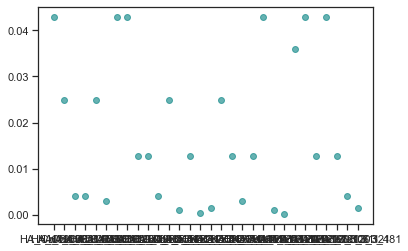

In [676]:
logReg_intersection_fisher = np.intersect1d(antigen_name_logR,anitgen_name_fisher)
logReg_intersection_fisher
#calculate std dev for all the significant peptides in both the test 
significanDf = array_df_filter_copy[logReg_intersection_fisher] 
logReg_intersection_fisher_stdDict = std_deviation(significanDf)
logReg_intersection_fisher_stdDict

'''
for i in range(len(logReg_intersection_fisher)):
    drawBoxPlot(logReg_intersection_fisher[i],"group",array_df_filter)

temp = np.append(logReg_intersection_fisher,"group")
logReg_intersection_fisher_dist_plot_df = array_df_filter[temp]
logReg_intersection_fisher_dist_plot_df
rt.pT.plot_columns_dist_hue(logReg_intersection_fisher_dist_plot_df,"group")'''
pvalues_fisher_df = FischerSigDF_filter[["Antigen","p-value"]].copy()
#pvalues_fisher_df["Test-Type"] = "fisher"
pvalues_fisher_df
#pvalues_logr_df = lgregressionSigDf_RDead_Rlive[["Antigen","p-value"]].copy()
#pvalues_logr_df["Test-Type"] = "logr"
#pvalues_logr_df

#logReg_intersection_fisher_pvalue_df = pd.concat([pvalues_fisher_df,pvalues_logr_df],axis=0)
#logReg_intersection_fisher_pvalue_df
#drawBoxPlot("p-value","Test-Type",logReg_intersection_fisher_pvalue_df)
x= pvalues_fisher_df[["Antigen"]]
y= pvalues_fisher_df[["p-value"]]
x
y
rt.pT.plot_scatter(x,y,x_rotation=90)
#sns.scatterplot(x='Antigen', y='p-value', data=pvalues_fisher_df)


### Draw a Box plot for the peptides  that are signifcant in Logistic regession and not in  fisher exact test.

array(['HA_Cal09_106', 'HA_Cal09_166', 'HA_Cal09_241', 'HA_Cal09_296',
       'HA_Cal09_321', 'HA_Cal09_46', 'HA_Cal09_526', 'HA_Cal09_541',
       'HA_Vie1203_221', 'HA_Vie1203_326', 'HA_Vie1203_331',
       'HA_Vie1203_526', 'HA_Vie1203_546', 'HA_X31_142', 'HA_X31_172',
       'HA_X31_327', 'HA_X31_352'], dtype=object)

,HA_Cal09_106,HA_Cal09_166,HA_Cal09_241,HA_Cal09_296,HA_Cal09_321,HA_Cal09_46,HA_Cal09_526,HA_Cal09_541,HA_Vie1203_221,HA_Vie1203_326,HA_Vie1203_331,HA_Vie1203_526,HA_Vie1203_546,HA_X31_142,HA_X31_172,HA_X31_327,HA_X31_352,group
20,14330,9073,12752,18409,18719,7390,15128,18605,13939,7920,2006,4657,3408,7790,48956,6523,20717,Rapa_Dead
21,13644,14686,9005,13581,19557,23728,16941,15626,15746,16297,6876,5870,5833,6946,40876,26123,14379,Rapa_Dead
22,1433,14903,11481,18315,19619,16999,3332,8613,15493,14594,6923,3771,3649,6977,1916,20385,10092,Rapa_Dead
23,12842,17422,12772,16595,20150,14850,6310,7837,15478,20,6958,6240,4475,3447,21899,14223,15453,Rapa_Dead
24,52710,15574,6358,13559,19561,10762,3953,6773,16431,12415,8459,5492,6448,4931,27938,20881,15116,Rapa_Dead
25,7582,10263,9316,18443,20071,12361,7095,8185,10913,14541,6577,6604,4982,6769,27324,20651,19605,Rapa_Dead
26,20,4748,20,3489,17051,17063,6921,11848,9165,11603,8006,7022,6932,6694,25264,18141,9521,Rapa_Dead
27,18379,20,20,17748,13392,13884,7250,10403,7598,16417,2464,8227,5529,2335,42804,3256,13103,Rapa_Dead
28,20,1306,20,21661,20,9724,3132,7898,7400,9756,20,5123,4983,2089,24531,19522,9139,Rapa_Live
29,167,20,20,9632,4231,18465,4724,8391,20,20,1508,3656,2322,2696,9411,14869,17225,Rapa_Live


C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

{'HA_Cal09_106': 12450.258208562445,
 'HA_Cal09_166': 5875.560867370267,
 'HA_Cal09_241': 4953.120339620817,
 'HA_Cal09_296': 7540.724237616555,
 'HA_Cal09_321': 6178.320428804875,
 'HA_Cal09_46': 6928.9340470073585,
 'HA_Cal09_526': 4497.871746726445,
 'HA_Cal09_541': 4799.683913203729,
 'HA_Vie1203_221': 5277.874587708602,
 'HA_Vie1203_326': 5206.502592912059,
 'HA_Vie1203_331': 2948.232255453896,
 'HA_Vie1203_526': 1718.0664842911183,
 'HA_Vie1203_546': 2214.5243595158054,
 'HA_X31_142': 2228.5386959027214,
 'HA_X31_172': 15523.67940756203,
 'HA_X31_327': 9063.216549449882,
 'HA_X31_352': 5743.817366643722}

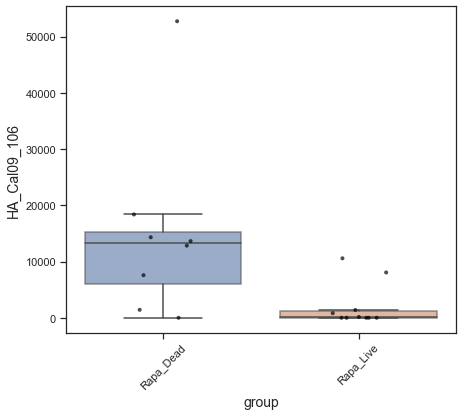

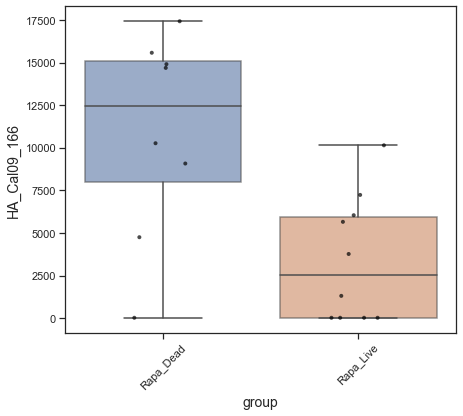

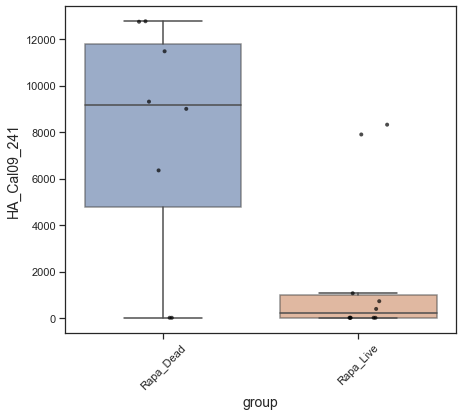

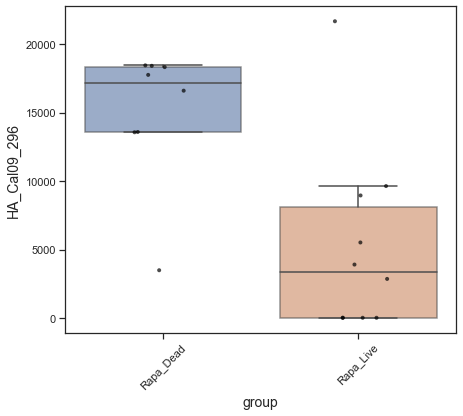

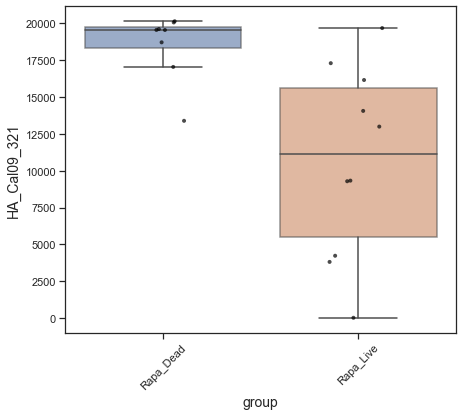

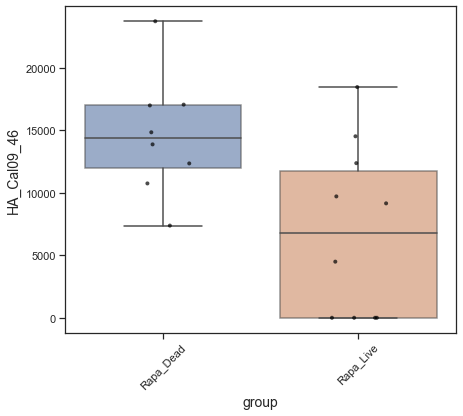

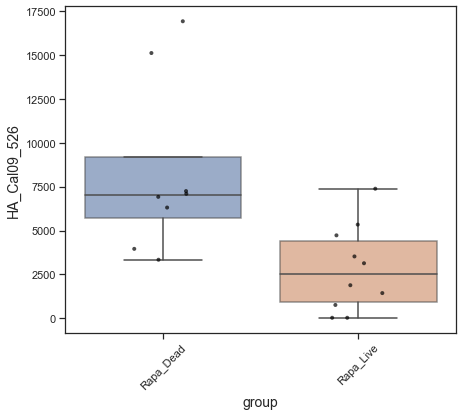

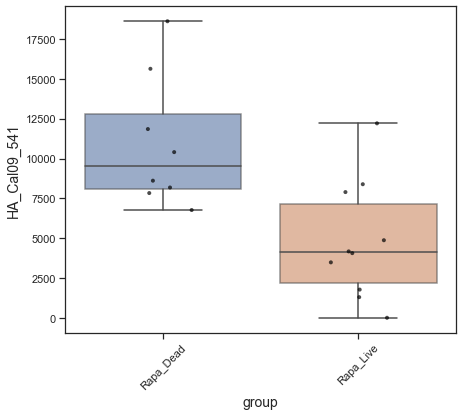

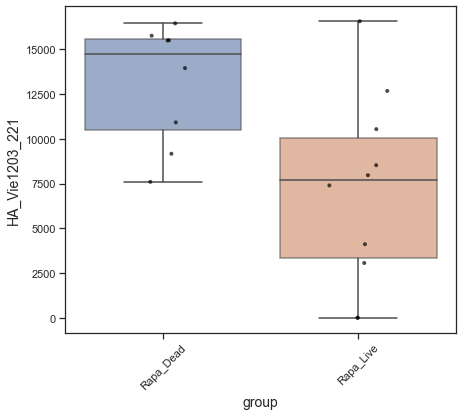

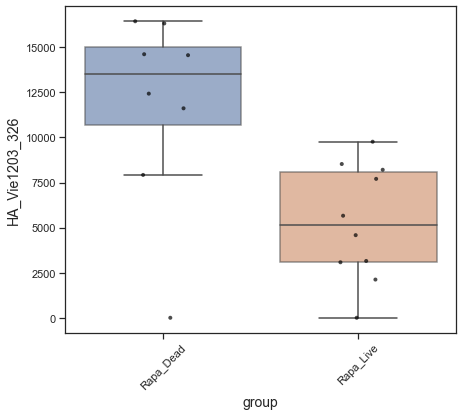

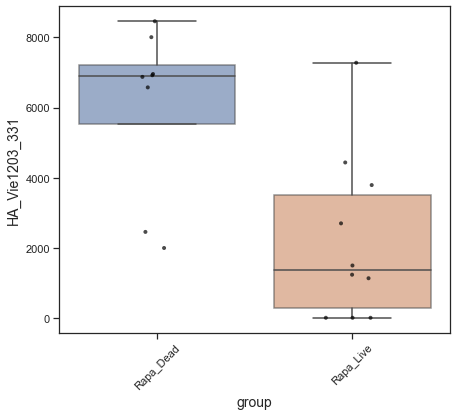

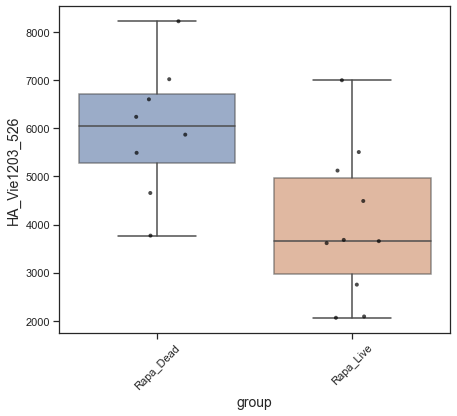

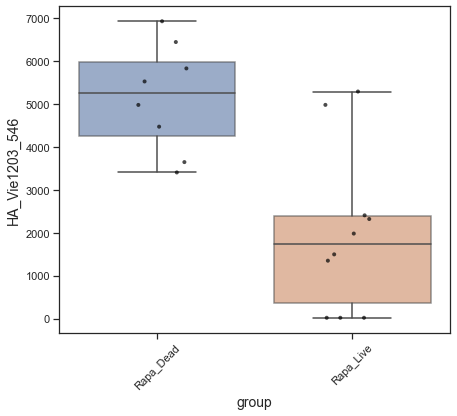

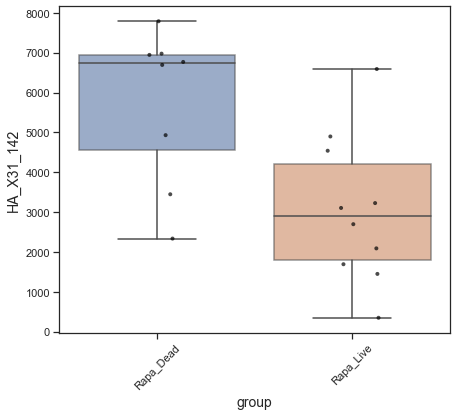

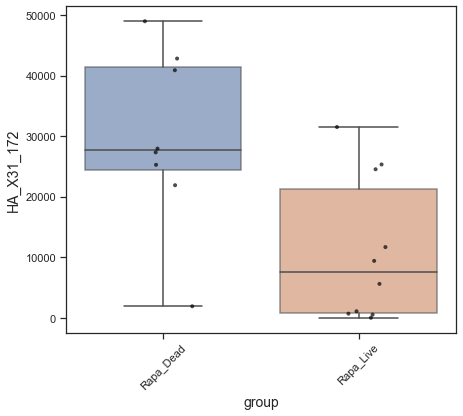

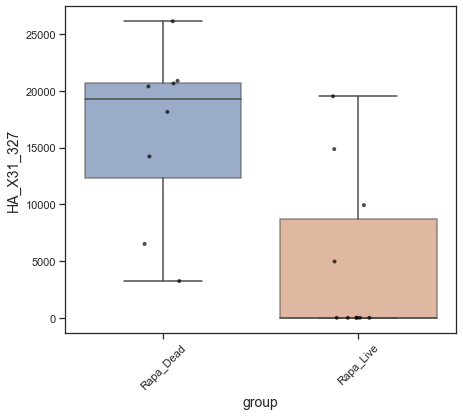

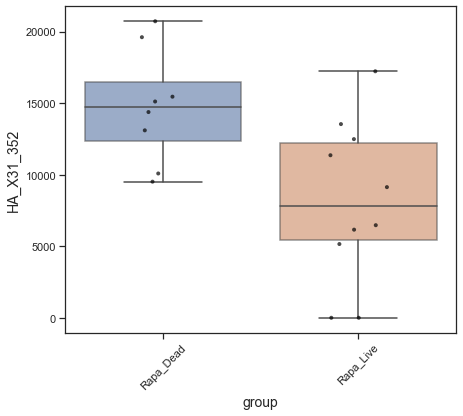

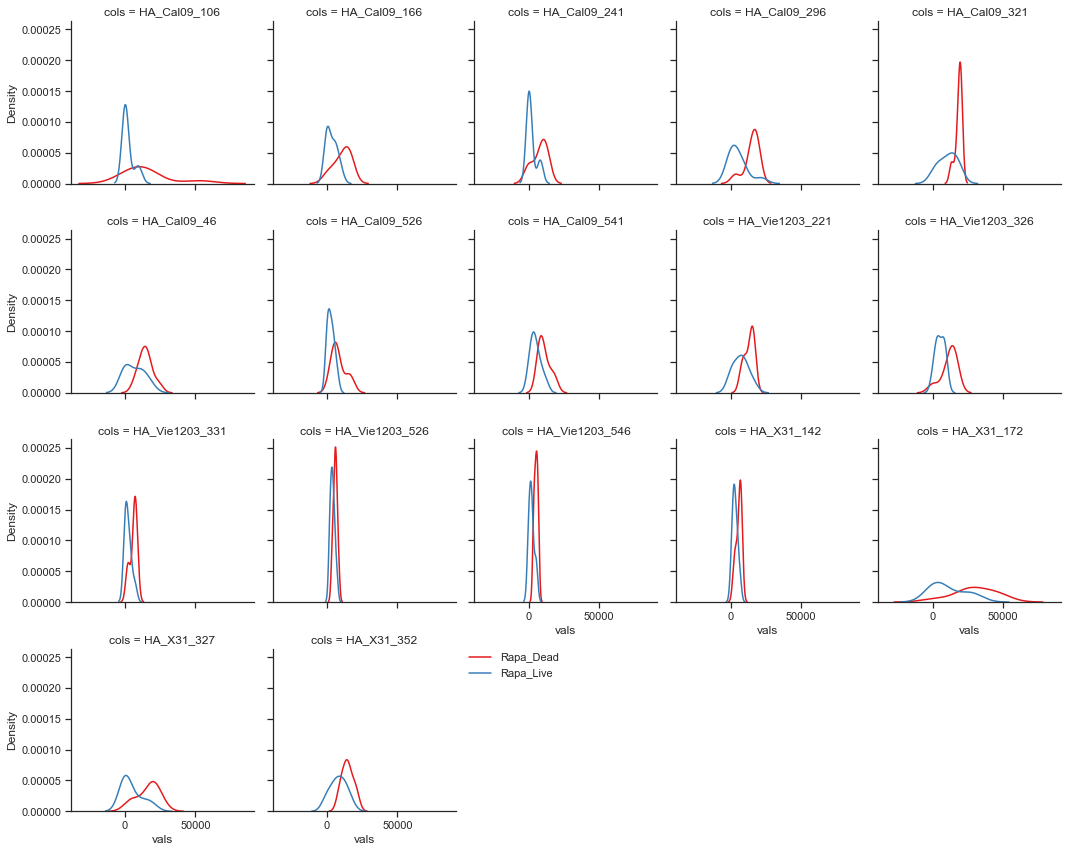

In [678]:
logr_fisher_diff = np.setdiff1d(antigen_name_logR,anitgen_name_fisher)
logr_fisher_diff
for i in range(len(logr_fisher_diff)):
    drawBoxPlot(logr_fisher_diff[i],"group",array_df_filter)
temp = np.append(logr_fisher_diff,"group")
logr_fisher_diff_dist_plot_df = array_df_filter[temp]
logr_fisher_diff_dist_plot_df
rt.pT.plot_columns_dist_hue(logr_fisher_diff_dist_plot_df,"group")
logr_fisher_diff_df = array_df_filter_copy[logr_fisher_diff]
logr_fisher_diff_std = std_deviation(logr_fisher_diff_df)
logr_fisher_diff_std

### Draw a Box plot for the peptides  that are signifcant in fisher exact test and not in logistic regression 

In [679]:
fisher_logR_diff = np.setdiff1d(anitgen_name_fisher,antigen_name_logR)
fisher_logR_diff
'''
for i in range(len(fisher_logR_diff)):
    drawBoxPlot(fisher_logR_diff[i],"group",array_df_filter)
temp = np.append(fisher_logR_diff,"group")
fisher_logR_diff_dist_plot_df = array_df_filter[temp]
fisher_logR_diff_dist_plot_df
rt.pT.plot_columns_dist_hue(fisher_logR_diff_dist_plot_df,"group")'''

fisher_logR_diff_df = array_df_filter_copy[fisher_logR_diff]
fisher_logR_diff_std = std_deviation(fisher_logR_diff_df)
fisher_logR_diff_std

array(['HA_Cal09_146', 'HA_Cal09_36', 'HA_Cal09_371', 'HA_Cal09_396',
       'HA_Cal09_486', 'HA_Vie1203_126', 'HA_Vie1203_161',
       'HA_Vie1203_231', 'HA_Vie1203_311', 'HA_Vie1203_481',
       'HA_Vie1203_51', 'HA_X31_222', 'HA_X31_277', 'HA_X31_332',
       'HA_X31_367', 'HA_X31_412'], dtype=object)

'\nfor i in range(len(fisher_logR_diff)):\n    drawBoxPlot(fisher_logR_diff[i],"group",array_df_filter)\ntemp = np.append(fisher_logR_diff,"group")\nfisher_logR_diff_dist_plot_df = array_df_filter[temp]\nfisher_logR_diff_dist_plot_df\nrt.pT.plot_columns_dist_hue(fisher_logR_diff_dist_plot_df,"group")'

{'HA_Cal09_146': 7830.849379218068,
 'HA_Cal09_36': 6305.807160178468,
 'HA_Cal09_371': 7454.310320127908,
 'HA_Cal09_396': 16924.57297097921,
 'HA_Cal09_486': 12529.757769253676,
 'HA_Vie1203_126': 6035.740323018676,
 'HA_Vie1203_161': 2514.420255689614,
 'HA_Vie1203_231': 6453.423770218773,
 'HA_Vie1203_311': 8961.7704035214,
 'HA_Vie1203_481': 11657.718202605432,
 'HA_Vie1203_51': 9290.358277088493,
 'HA_X31_222': 7189.124502407168,
 'HA_X31_277': 12372.210707598293,
 'HA_X31_332': 8411.43454629133,
 'HA_X31_367': 3809.99696906979,
 'HA_X31_412': 15656.032142418606}

In [219]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_X31_277"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
14,2,HA_X31_277,"a=0, b=10, c=7, d=1",0.000251,0.014329,0.014329,IgM,Rapa_Live vs. Rapa_Dead


## GLM logistic regression for HA_X31_277

In [220]:
#convert categorical to binary 
#array_df_filter_copy = array_df_filter.copy()
print(array_df_filter[["group"]])
array_df_filter_copy = rt.get_labels_forcategorical(array_df_filter,"group")


        group
20  Rapa_Dead
21  Rapa_Dead
22  Rapa_Dead
23  Rapa_Dead
24  Rapa_Dead
25  Rapa_Dead
26  Rapa_Dead
27  Rapa_Dead
28  Rapa_Live
29  Rapa_Live
30  Rapa_Live
31  Rapa_Live
32  Rapa_Live
33  Rapa_Live
34  Rapa_Live
35  Rapa_Live
36  Rapa_Live
37  Rapa_Live


group_bin
1            10
0             8
dtype: int64

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HA_X31_277', ylabel='Density'>

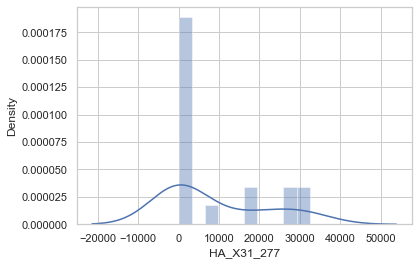

In [612]:
outcome=array_df_filter_copy[["group_bin"]]
outcome.value_counts()
sns.distplot(array_df_filter_copy["HA_X31_277"],bins=10)
plt.show()

In [648]:

standardizeFunc = lambda col: (col - np.nanmean(col)) / np.nanstd(col)

X_HA_X31_277 = array_df_filter_copy[["HA_X31_277"]]
X_HA_X31_277 = np.log2(X_HA_X31_277["HA_X31_277"])
#X = array_df_filter_copy[[""]].apply(standardizeFunc)
#X_HA_X31_277 = array_df_filter_copy[["HA_X31_277"]]
#sns.distplot(X_HA_X31_277["HA_X31_277"])
#plt.show()
X_HA_X31_277

20     4.321928
21    14.225358
22    14.021934
23    14.984552
24    14.701523
25    14.686172
26    13.176485
27    14.981879
28     4.321928
29     4.321928
30     4.321928
31     4.321928
32     4.321928
33     4.321928
34     4.321928
35     4.321928
36     4.321928
37     4.321928
Name: HA_X31_277, dtype: float64

In [483]:
help(rt.pT.plot_boxplot)

Help on function plot_boxplot in module LielTools.PlotTools:

plot_boxplot(seriesX, seriesY, seriesHue=None, stripplot=True, boxplot=True, saveFolder=None, ax=None, figsize=(7, 6), showf=False, plotTitle='', xTitle='', yTitle='', xRotation=45, titleFontSize=18, titleColor='maroon', legendTitle='', font_scale=1, snsStyle='ticks', boxTransparency=0.6, jitter=0.15, stripplot_alpha=0.7, stripplot_size=4, stripplot_color=None, linewidth=0, stripplot_palette=None, palette=None, order=None, xy_title_fontsize=14, boxplot_color=None, add_mean=False, mean_marker='_', mean_color='red', mean_size=100, mean_linewidth=3, mean_alpha=1, hide_indices_in_stripplot=None, horizontal=False)
    # still needs fixing the hue in str
    # former plotBoxplot



In [649]:
res_HA_X31_277 = GLM_function(X_HA_X31_277,outcome)
res_HA_X31_277.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.3510
Date:                Tue, 21 Jun 2022   Deviance:                       6.7020
Time:                        15:52:11   Pearson chi2:                     11.0
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6327
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5085   7941.166      0.002      0.999   -1.56e+04    1.56e+04
HA_X31_277    -2.5928   1837.413     -0.001      0.999   -3603.856    3598.670
==============================================================================
"""

(array([5.50000000e-01, 2.55639683e-12, 7.68113819e-12, 5.17560872e-14,
        2.17189491e-13, 2.34855542e-13, 7.86988722e-09, 5.24590921e-14,
        5.50000000e-03, 5.50000000e-03, 5.50000000e-03, 5.50000000e-03,
        5.50000000e-03, 5.50000000e-03, 5.50000000e-03, 5.50000000e-03,
        5.50000000e-03, 5.50000000e-03]),
 array([0.58747715, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99999999, 1.        , 0.99451698, 0.99451698,
        0.99451698, 0.99451698, 0.99451698, 0.99451698, 0.99451698,
        0.99451698, 0.99451698, 0.99451698]))

Text(0.5, 0, 'x')

Text(0, 0.5, 'Cooks Distance')

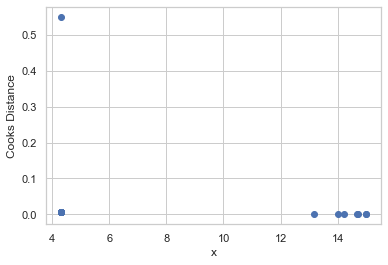

In [589]:
influence = res_HA_X31_277.get_influence()
cooks = influence.cooks_distance
cooks
plt.scatter(X_HA_X31_277, cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

## Using Logit from the statsmodel HA_X31_277


In [323]:
log_reg = sm.Logit(y,X).fit()
log_reg.summary()

ValueError: endog must be in the unit interval.

## GLM logistic regression for HA_X31_332

In [324]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_X31_332"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
15,3,HA_X31_332,"a=0, b=10, c=6, d=2",0.001508,0.085973,0.028658,IgM,Rapa_Live vs. Rapa_Dead


In [325]:
#X_HA_X31_332= array_df_filter_copy[["HA_X31_332"]].apply(standardizeFunc)
X_HA_X31_332= array_df_filter_copy[["HA_X31_332"]]
X_HA_X31_332


,HA_X31_332
20,10973
21,17321
22,18228
23,20581
24,20018
25,18234
26,20
27,20
28,1640
29,20


In [326]:
model_HA_X31_332_res = GLM_function(X_HA_X31_332,outcome)
model_HA_X31_332_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.6104
Date:                Mon, 20 Jun 2022   Deviance:                       11.221
Time:                        15:18:53   Pearson chi2:                     12.7
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5279
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6718      0.788      2.120      0.034       0.126       3.217
HA_X31_332    -0.0005      0.000     -1.107      0.268      -0.001       0.000
==============================================================================
"""

## Using Logit from the statsmodel HA_X31_332

In [327]:
log_reg_HA_X31_332 = sm.Logit(y,sm.add_constant(X_HA_X31_332)).fit()
log_reg_HA_X31_332.summary()

ValueError: endog must be in the unit interval.

### Lets use different fischer test package
Construct a 2X2 contigency table 

contigency table for the HA_X31_277

In [328]:
HA_X31_277_bin = array_df_filter_copy[["HA_X31_277_binarized"]]
HA_X31_277_contigency_table = pd.DataFrame(index = ["Rapa_Dead","Rapa_live"],columns=["PosRes","NoRes"])
#tempdf = 

HA_X31_277_contigency_table.PosRes["Rapa_Dead"] = array_df_filter_copy.loc[(array_df_filter["group"]=="Rapa_Dead") & (array_df_filter["HA_X31_277_binarized"]==1),["HA_X31_277_binarized"]].shape[0]
HA_X31_277_contigency_table.NoRes["Rapa_Dead"] = array_df_filter_copy.loc[(array_df_filter["group"]=="Rapa_Dead") & (array_df_filter["HA_X31_277_binarized"]==0),["HA_X31_277_binarized"]].shape[0]
HA_X31_277_contigency_table.PosRes["Rapa_live"] = array_df_filter_copy.loc[(array_df_filter["group"]=="Rapa_Live") & (array_df_filter["HA_X31_277_binarized"]==1),["HA_X31_277_binarized"]].shape[0]
HA_X31_277_contigency_table.NoRes["Rapa_live"] = array_df_filter_copy.loc[(array_df_filter["group"]=="Rapa_Live") & (array_df_filter["HA_X31_277_binarized"]==0),["HA_X31_277_binarized"]].shape[0]
#print("HA_X31_277_contigency_table \n {}".format(HA_X31_277_contigency_table.to_string()))
HA_X31_277_contigency_table

,PosRes,NoRes
Rapa_Dead,7,1
Rapa_live,0,10


In [329]:
oddsratio, pvalue = fisher_exact(HA_X31_277_contigency_table.to_numpy())
pvalue

0.00025138260432378077

## GLM logistic regression for HA_Vie1203_481

In [330]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Vie1203_481"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
29,9,HA_Vie1203_481,"a=0, b=10, c=6, d=2",0.001508,0.058824,0.019608,IgM,Rapa_Live vs. Rapa_Dead


In [584]:
array_df_filter_copy[["HA_Vie1203_481"]]
X_HA_Vie1203_481= array_df_filter_copy[["HA_Vie1203_481"]].apply(standardizeFunc)
X_HA_Vie1203_481

,HA_Vie1203_481
20,33748
21,2649
22,7889
23,39271
24,18854
25,2577
26,6623
27,11749
28,20
29,20


,HA_Vie1203_481
20,2.306074
21,-0.361601
22,0.087886
23,2.779837
24,1.028465
25,-0.367777
26,-0.020711
27,0.418998
28,-0.587117
29,-0.587117


Perfect separation detected


<AxesSubplot:xlabel='group', ylabel='HA_Vie1203_481'>

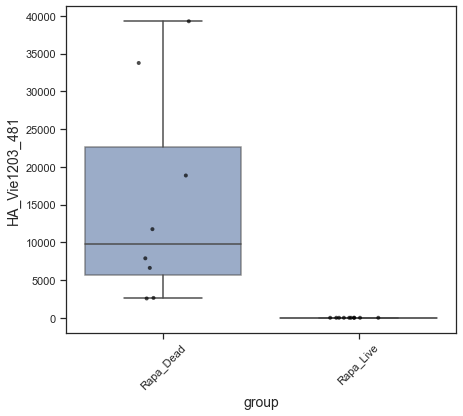

In [332]:
try:
    model_HA_Vie1203_481_res = GLM_function(X_HA_Vie1203_481,outcome)
    model_HA_Vie1203_481_res.summary()
except sm.tools.sm_exceptions.PerfectSeparationError:
    print("Perfect separation detected")
x= array_df_filter["group"]
y = array_df_filter["HA_Vie1203_481"]
rt.pT.plot_boxplot(x,y)

Adding noise to the values of HA_X31_277

In [470]:
NoiseMaskCount = X_HA_X31_277[X_HA_X31_277["HA_X31_277"]<=20].count()
Noise = np.random.normal(50,10,NoiseMaskCount)
Noise

array([58.34748055, 51.56663999, 60.13509741, 60.7339152 , 52.82985669,
       54.14226344, 58.87376113, 27.30544665, 28.22730213, 42.99012992,
       43.73115969])

In [486]:
noise = list(Noise)
#X_HA_X31_277_df = add_Gausian_noise_to_df(noise,X_HA_X31_277,"HA_X31_277")
#X_HA_X31_277_df
print("After applying standarisation")
X_HA_X31_277_df = X_HA_X31_277[["HA_X31_277"]].apply(standardizeFunc)
X_HA_X31_277_df

After applying standarisation


,HA_X31_277
20,-0.730540
21,0.815991
22,0.612389
23,1.888152
24,1.421380
25,1.398587
26,0.016134
27,1.883302
28,-0.730540
29,-0.730540


### Box plot after adding noise to the data 

<AxesSubplot:xlabel='group_bin', ylabel='HA_X31_277'>

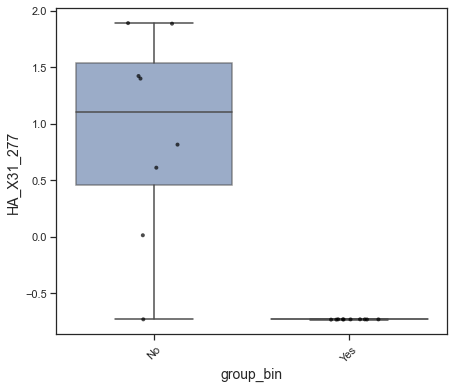

In [472]:
xaxis = X_HA_X31_277_df["HA_X31_277"]
yaxis = outcome["group_bin"]
rt.pT.plot_boxplot(yaxis,xaxis)

In [473]:
model_X_HA_X31_277_res = GLM_function(X_HA_X31_277_df,outcome)
model_X_HA_X31_277_res.summary()
model_X_HA_X31_277_res.pvalues

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Jun 2022   Deviance:                       5.4763
Time:                        17:25:41   Pearson chi2:                     6.15
No. Iterations:                    18   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2009.9161   2907.257     -0.691      0.489   -7708.034    3688.202
HA_X31_277 -2757.3108   3984.983     -0.692      0.489   -1.06e+04    5053.113
==============================================================================
"""

const         0.489349
HA_X31_277    0.488984
dtype: float64

## Signifcant in both Fisher and logistic regression 

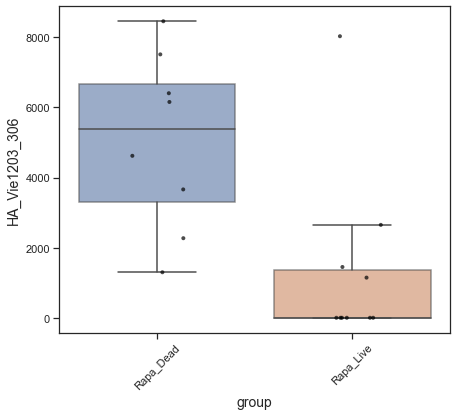

In [389]:
#HA_Vie1203_306
#draw boxplot 
drawBoxPlot("group","HA_Vie1203_306",array_df_filter)

### Modeling for the HA_Vie1203_306

Show the fisher exact test result and then show the GLM modeling Result 

In [391]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Vie1203_306"]


,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
26,6,HA_Vie1203_306,"a=1, b=9, c=5, d=3",0.042986,1.0,0.167647,IgM,Rapa_Live vs. Rapa_Dead


In [395]:
#HA_Vie1203_306= array_df_filter_copy[["HA_Vie1203_306"]]
HA_Vie1203_306=HA_Vie1203_306[["HA_Vie1203_306"]].apply(standardizeFunc)
HA_Vie1203_306

,HA_Vie1203_306
20,-0.558419
21,0.543872
22,1.053544
23,1.503921
24,1.817386
25,0.225744
26,-0.235959
27,1.136158
28,1.675811
29,-0.609053


In [405]:
model_HA_Vie1203_306_res = GLM_function(HA_Vie1203_306,outcome)
model_HA_Vie1203_306_res.summary()
print("Pvalues:")
model_HA_Vie1203_306_res.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.5846
Date:                Mon, 20 Jun 2022   Deviance:                       17.169
Time:                        15:58:44   Pearson chi2:                     21.0
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3430
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1990      0.606      0.328      0.743      -0.990       1.388
HA_Vie1203_306    -1.5979      0.723     -2.209      0.027      -3.016      -0.180
==================================================================================
"""

Pvalues:


const             0.742777
HA_Vie1203_306    0.027165
dtype: float64

### Modeling for the HA_Cal09_36  and HA_Vie1203_161
This was found significant in the fisher test and not in Logistic regression

In [563]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Cal09_36"]
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Vie1203_161"]
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Cal09_396"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
0,0,HA_Cal09_36,"a=1, b=9, c=5, d=3",0.042986,1.0,0.167541,IgM,Rapa_Live vs. Rapa_Dead


,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
23,3,HA_Vie1203_161,"a=5, b=5, c=8, d=0",0.035948,1.0,0.167647,IgM,Rapa_Live vs. Rapa_Dead


,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
8,8,HA_Cal09_396,"a=1, b=9, c=6, d=2",0.012821,0.641026,0.106838,IgM,Rapa_Live vs. Rapa_Dead


In [650]:
array_df_filter_copy[["HA_Cal09_36"]]
#do log tranform
temp = np.log2(array_df_filter_copy[["HA_Cal09_36"]])
temp
#X_HA_Cal09_36=temp.apply(standardizeFunc)
X_HA_Cal09_36 = temp
array_df_filter_copy[["HA_Vie1203_161"]]
X_HA_Vie1203_161=array_df_filter_copy[["HA_Vie1203_161"]].apply(standardizeFunc)
X_HA_Vie1203_161
array_df_filter_copy[["HA_Cal09_396"]]
log_tranform_HA_Cal09_396 = np.log10(array_df_filter_copy[["HA_Cal09_396"]])
log_tranform_HA_Cal09_396
X_HA_Cal09_396=array_df_filter_copy[["HA_Cal09_396"]].apply(standardizeFunc)
X_HA_Cal09_396

,HA_Cal09_36
20,4951
21,1435
22,1051
23,1286
24,6938
25,4099
26,18388
27,24648
28,3987
29,1785


,HA_Cal09_36
20,12.273504
21,10.486835
22,10.037547
23,10.328675
24,12.760304
25,12.001056
26,14.166477
27,14.589183
28,11.961088
29,10.801708


,HA_Vie1203_161
20,6720
21,6817
22,4105
23,7462
24,5881
25,5750
26,4758
27,4299
28,7134
29,6162


,HA_Vie1203_161
20,0.776057
21,0.814634
22,-0.263944
23,1.071155
24,0.442382
25,0.390282
26,-0.004242
27,-0.186789
28,0.940707
29,0.554137


,HA_Cal09_396
20,21825
21,20
22,766
23,22186
24,25992
25,9786
26,51825
27,56548
28,2345
29,1632


,HA_Cal09_396
20,4.338954
21,1.301030
22,2.884229
23,4.346079
24,4.414840
25,3.990605
26,4.714539
27,4.752417
28,3.370143
29,3.212720


,HA_Cal09_396
20,0.583205
21,-0.705158
22,-0.661080
23,0.604535
24,0.829415
25,-0.128127
26,2.355776
27,2.634838
28,-0.567784
29,-0.609912


In [651]:
model_HA_Cal09_36_res = GLM_function(X_HA_Cal09_36,outcome)
model_HA_Cal09_36_res.summary()
print("Pvalues:")
model_HA_Cal09_36_res.pvalues


model_HA_Vie1203_161_res = GLM_function(X_HA_Vie1203_161,outcome)
model_HA_Vie1203_161_res.summary()
print("Pvalues:")
model_HA_Vie1203_161_res.pvalues

model_HA_Cal09_396_res = GLM_function(X_HA_Cal09_396,outcome)
model_HA_Cal09_396_res.summary()
print("Pvalues:")
model_HA_Cal09_396_res.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.828
Date:                Tue, 21 Jun 2022   Deviance:                       21.656
Time:                        16:10:34   Pearson chi2:                     17.4
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1570
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.1428      4.409      1.620      0.105      -1.499      15.784
HA_Cal09_36    -0.6053      0.383     -1.580      0.114      -1.356       0.146
===============================================================================
"""

Pvalues:


const          0.105227
HA_Cal09_36    0.114128
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.239
Date:                Tue, 21 Jun 2022   Deviance:                       22.479
Time:                        16:10:34   Pearson chi2:                     17.2
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1176
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2815      0.514      0.548      0.584      -0.725       1.288
HA_Vie1203_161    -0.8000      0.594     -1.348      0.178      -1.963       0.363
==================================================================================
"""

Pvalues:


const             0.583635
HA_Vie1203_161    0.177752
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.1415
Date:                Tue, 21 Jun 2022   Deviance:                       14.283
Time:                        16:10:34   Pearson chi2:                     15.8
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4403
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7903      1.197     -0.660      0.509      -3.136       1.555
HA_Cal09_396    -3.7635      2.232     -1.686      0.092      -8.138       0.611
================================================================================
"""

Pvalues:


const           0.509054
HA_Cal09_396    0.091720
dtype: float64

### Modeling for the HA_Cal09_326 
This was found significant in the both the  tests more than 70% point in  rapa Live are at 20. 

In [557]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_Cal09_326"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
6,6,HA_Cal09_326,"a=1, b=9, c=5, d=3",0.042986,1.0,0.167541,IgM,Rapa_Live vs. Rapa_Dead


In [558]:
array_df_filter_copy[["HA_Cal09_326"]]
X_HA_Cal09_326=array_df_filter_copy[["HA_Cal09_326"]].apply(standardizeFunc)
X_HA_Cal09_326

,HA_Cal09_326
20,5364
21,14323
22,13943
23,14885
24,7844
25,3163
26,20
27,3459
28,20
29,20


,HA_Cal09_326
20,0.188629
21,1.812254
22,1.743387
23,1.914104
24,0.638075
25,-0.210255
26,-0.779856
27,-0.156612
28,-0.779856
29,-0.779856


In [559]:
model_HA_Cal09_326_res = GLM_function(X_HA_Cal09_326,outcome)
model_HA_Cal09_326_res.summary()
print("Pvalues:")
model_HA_Cal09_326_res.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.0311
Date:                Tue, 21 Jun 2022   Deviance:                       18.062
Time:                        11:00:06   Pearson chi2:                     18.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3096
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1195      0.607      0.197      0.844      -1.071       1.310
HA_Cal09_326    -1.5304      0.768     -1.993      0.046      -3.035      -0.026
================================================================================
"""

Pvalues:


const           0.844009
HA_Cal09_326    0.046219
dtype: float64

## check normal distribution using shaprio test 

In [672]:
shapiro(array_df_filter_copy['HA_Vie1203_51']).pvalue

2.3564160073874518e-05

# Modeling for the HA_X31_367

In [680]:
FischerSigDF_filter[FischerSigDF_filter["Antigen"]=="HA_X31_367"]

,Unnamed: 0,Antigen,Fisher Counts,p-value,adjusted p-value,q-value,isotype,group_names
16,4,HA_X31_367,"a=7, b=3, c=1, d=7",0.024818,1.0,0.176831,IgM,Rapa_Live vs. Rapa_Dead


In [691]:
array_df_filter_copy[["HA_X31_367"]]
#X_HA_X31_367=array_df_filter_copy[["HA_X31_367"]].apply(standardizeFunc)
X_HA_X31_367 = np.log2(array_df_filter_copy[["HA_X31_367"]])
X_HA_X31_367=X_HA_X31_367[["HA_X31_367"]].apply(standardizeFunc)
X_HA_X31_367

,HA_X31_367
20,20
21,11599
22,2445
23,808
24,1298
25,550
26,2331
27,2767
28,7635
29,12539


,HA_X31_367
20,-2.505595
21,0.952637
22,0.106483
23,-0.495297
24,-0.237670
25,-0.704349
26,0.080532
27,0.173723
28,0.725360
29,0.994989


In [692]:
model_HA_X31_367_res = GLM_function(X_HA_X31_367,outcome)
model_HA_X31_367_res.summary()
print("Pvalues:")
model_HA_X31_367_res.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              group_bin   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.559
Date:                Thu, 23 Jun 2022   Deviance:                       23.119
Time:                        10:26:56   Pearson chi2:                     18.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08565
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2134      0.498      0.429      0.668      -0.762       1.189
HA_X31_367     0.6492      0.562      1.156      0.248      -0.452       1.750
==============================================================================
"""

Pvalues:


const         0.668228
HA_X31_367    0.247733
dtype: float64

In [17]:
def dist_plot(df,fig_filename,fig_dist_path,y_cols):
    fig_path = os.path.join(fig_dist_path,fig_filename)
    fig = rt.pT.plot_columns_dist(array_df[y_cols], 
                                  fig_rows=30, fig_cols=4, figsize=(50, 40), 
                                  bins=20, font_scale=1.4,
                                  kde_color='black', hist_color='purple', hist_alpha=0.3,
                                  title="", title_fontsize=18, title_y=1.03,
                                  rug=True, rug_color='black', rug_alpha=0.3, rug_linewidth=1, rug_height=0.03, 
                                  output_file_path=fig_path)

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for 

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-pac

C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vikas jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for 

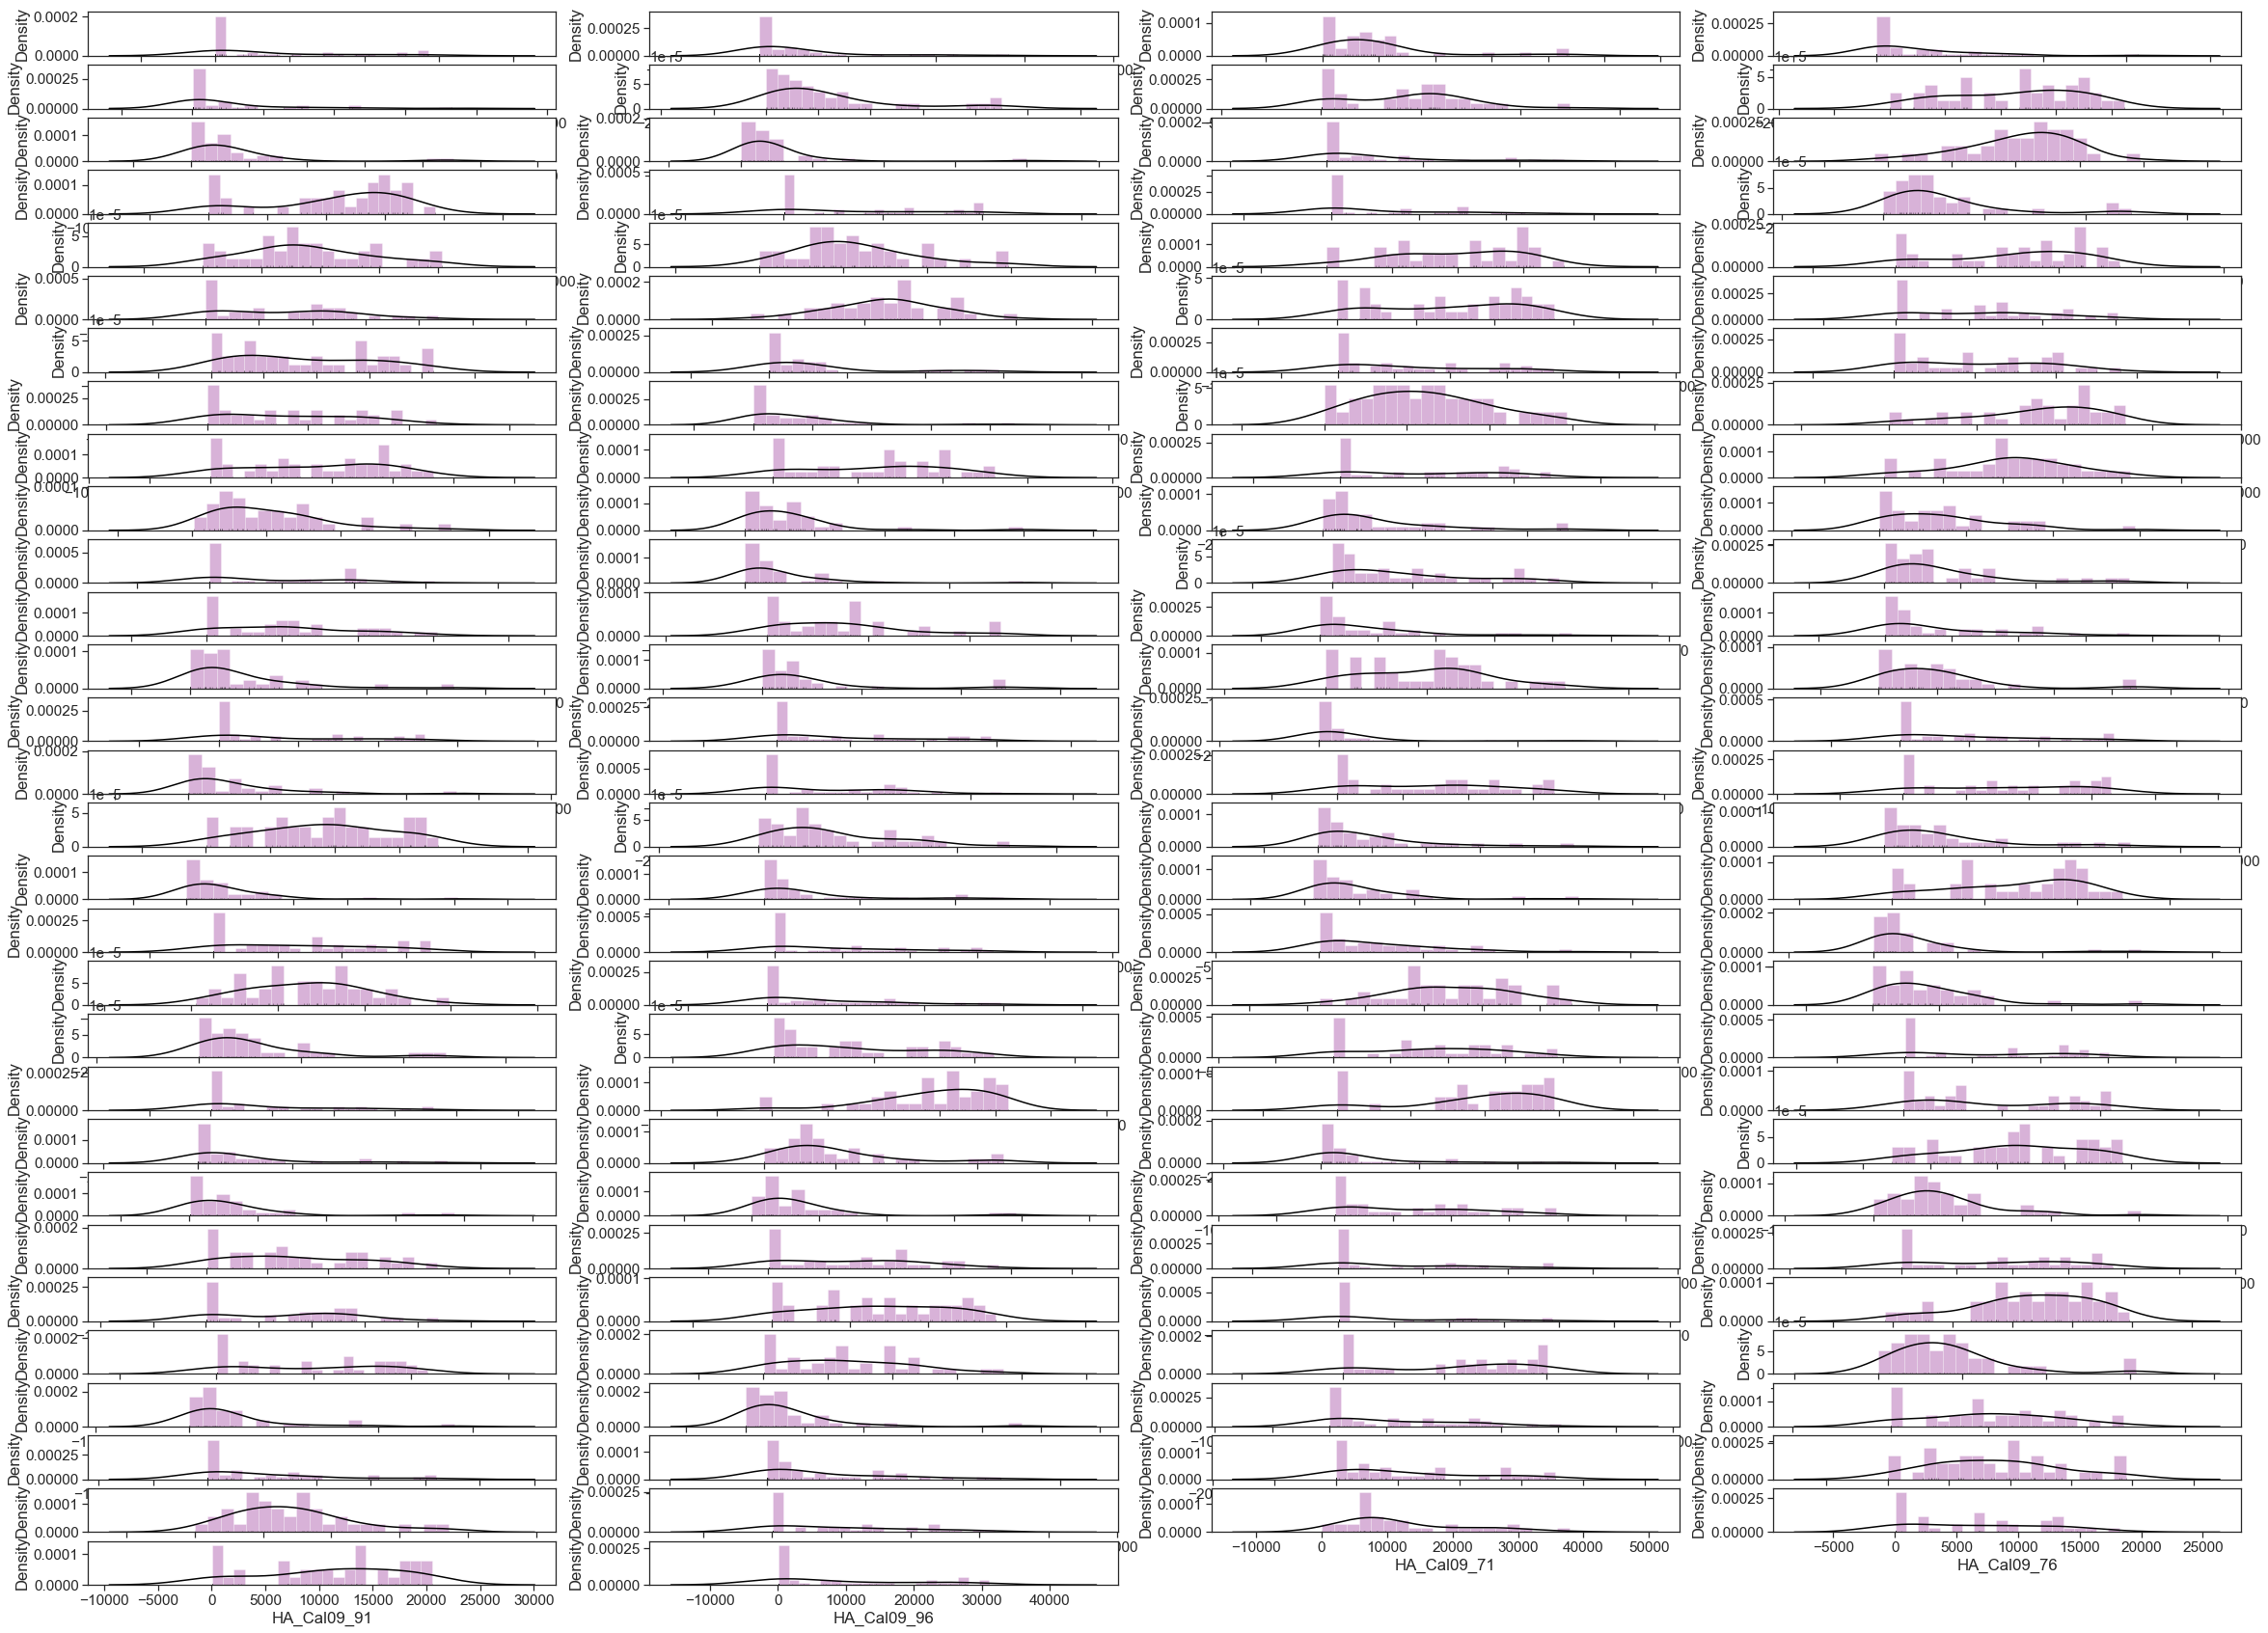

In [18]:
array_filtered_df = rt.readInputFiles("D:\PhD-Tomer\Projects\Rapamycin\output\HA_IgM","GLM_HA_IgM_ShaprioTest_All.xlsx",None)
#array_filtered_df
y_col = array_filtered_df.columns[:-1]
df_before_tranformation = array_df[y_col]
#df_before_tranformation
dist_plot(df_before_tranformation,"dist_before_transformation.jpg","D:\PhD-Tomer\Projects\Rapamycin\output\HA_IgM",y_col)

# Perfrom Multivaraite analysis using logistic regression 

In [38]:
# read the data
from sklearn.preprocessing import StandardScaler
path = r"D:\PhD-Tomer\Projects\Rapamycin\output\HA_IgM"
array_dataFileName = "GLM_HA_IgM_No_logTranform_All.xlsx"
df= rt.readInputFiles(path,array_dataFileName,None)


#drop few columns 

df.drop(["group_PBS_Dead","group_PBS_Live","group_Rapa_Dead"],inplace = True,axis=1)
df.head()
scaler =StandardScaler()

X = df.drop(["survival_group_Dead"],axis=1)
scaled_data = scaler.fit_transform(X)
y = df["survival_group_Dead"]

scaled_data.head()
y.head()


,HA_X31_7,HA_X31_12,HA_X31_17,HA_X31_27,HA_X31_32,HA_X31_507,HA_X31_512,HA_X31_57,HA_X31_62,HA_X31_72,...,HA_Cal09_536,HA_Cal09_541,HA_Cal09_66,HA_Cal09_71,HA_Cal09_76,HA_Cal09_91,HA_Cal09_96,Weight,survival_group_Dead,Group_PBS
0,2190,13778,19777,839,20,44967,5858,23290,15739,3807,...,4853,7373,26402,28898,14351,19238,23714,20.0,1,1
1,20,20,412,20,22158,5007,20,38190,832,20,...,2896,9395,15511,9435,20,20,9061,19.0,1,1
2,103,20,13720,20,301,10940,5466,35647,42834,555,...,6016,13425,25664,20487,8364,10147,20,20.1,1,1
3,20,2624,1192,4526,20,5991,5620,31881,4882,4257,...,4971,10770,13292,21465,13628,19666,13480,19.5,1,1
4,1581,5797,1745,20,4678,6834,8189,28148,13073,3202,...,6885,8239,20,9717,6772,17731,7008,20.5,1,1


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [24]:
from sklearn.model_selection import train_test_split
Xtrain,x_Test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,penalty="none",fit_intercept =True)
clf.fit(Xtrain,y_train)
y_pred_test = clf.predict(x_Test)
#params = clf.predict(x_Test)
#params
prob_vector = model.predict_proba(x_Test)[:,1]

LogisticRegression(penalty='none', random_state=0)

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
fpr, tpr, thresholds

(array([0. , 0. , 0. , 0.4, 0.4, 1. ]),
 array([0. , 0.2, 0.8, 0.8, 1. , 1. ]),
 array([2.00000000e+00, 1.00000000e+00, 9.99999995e-01, 2.33134826e-05,
        9.67095997e-06, 3.04132772e-17]))

In [101]:
def get_important_feature(Xtrain,ytrain,num_features):
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000),max_features=num_features)
    fs = fs.fit(Xtrain,ytrain)
    feature_idx = fs.get_support()
    feature_name = Xtrain.columns[feature_idx]
    return feature_name

# Check for indiviual L1 n L2 parameters and different feature size for HA NA IgG

In [2]:
#read the log transformed file name 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel,RFE
outcome = "survival_group"

rootpath = os.path.join(rt.ROOT,rt.PROJECT_PATH,rt.project_name,rt.OUTPUT_PARENT_FOLDER)
path = os.path.join(rootpath,"HA_NA_IgG")
df_ha_na = rt.readInputFiles(path,"log_tranformed_data_RAPA3_HA_NA_IgG.xlsx")
df_ha_na = rt.get_standardised_df(df_ha_na)


x_cols_list = rt.DataTools.list_removeItemIfExists(list(df_ha_na.columns),outcome)

#LogisticRegression(random_state=0,penalty="elasticnet",fit_intercept =True,solver="saga",l1_ratio = 0.5)
#X_train, X_test, y_train, y_test = train_test_split(df_ha_na[x_cols_list], df_ha_na[outcome], test_size=0.30, random_state=1)
#X_train,y_train
#get feature importance using selection model
glmoutputpath = os.path.join(path,"NoteBookOutput")
no_of_features = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,180]
l1 = 0.01
l2 = 0.03
no_of_feature_with_auc_dict = dict.fromkeys(no_of_features)

final_res_auc = pd.DataFrame(columns=["Auc","FPR","TPR"],index = no_of_features)
    
final_res_auc.index.set_names('Sigfeatures')
   
for num_features in no_of_features:
    
    #feature_names = get_important_feature(X_train,y_train,num_features)
    
    #remove the outcome column dataframe 
    #x_cols_list = rt.DataTools.list_removeItemIfExists(list(feature_names),outcome)
    resdict = rt.glm.glm_LOO(glmoutputpath, df_ha_na, y_col_name=outcome, x_cols_list = x_cols_list, model_name = "GLM_shaprio_HANA_IgG_0.01_0.03_FS_loo_{}".format(len(x_cols_list)), 
                                heatmap_figsize=(30,20), bar_figsize=(50,25),
                                alpha=l1, L1_wt=l2, heatmap_annotate_text=True, logistic=True,featureSelection=True,
                                num_feature = num_features)

    no_of_feature_with_auc_dict.update({num_features:resdict})

#write the all the auc details to a excel sheet
no_of_feature_with_auc_dict
for feature_num in no_of_feature_with_auc_dict.keys():
    final_res_auc.at[feature_num,"Auc"] = no_of_feature_with_auc_dict[feature_num]['roc_auc_info']['auc']
    final_res_auc.at[feature_num,"FPR"] = no_of_feature_with_auc_dict[feature_num]['roc_auc_info']['rates']['false positive rate']
    final_res_auc.at[feature_num,"TPR"] = no_of_feature_with_auc_dict[feature_num]['roc_auc_info']['rates']['true positive rate']

rt.writeOutputFile(path,"RoC_AUC_for_different_features_by_importanc_loo.xlsx",final_res_auc,write_index = True)

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
            160, 180],
           dtype='int64', name='Sigfeatures')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 185 but corresponding boolean dimension is 184

# Check for indiviual L1 n L2 parameters and different feature size for HA NA IgM

282

Int64Index([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
            140, 150, 160, 180, 200, 210, 220, 230, 250, 260, 280],
           dtype='int64', name='Sigfeatures')

Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


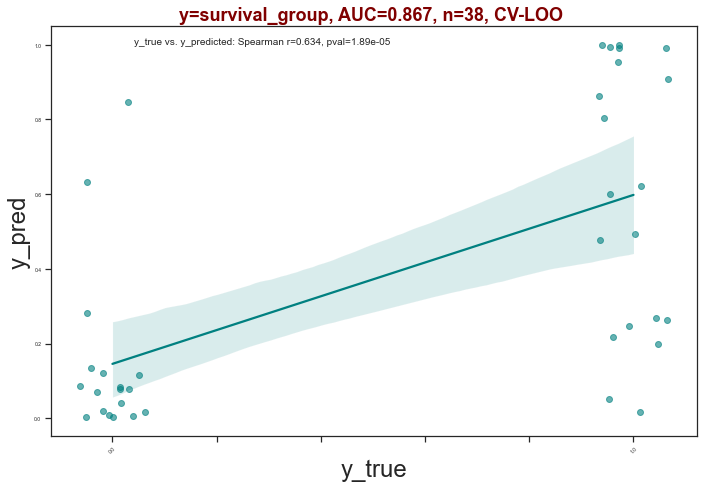

In [121]:
pathigM = os.path.join(rootpath,"HA_NA_IgM")
df_ha_na_igm = rt.readInputFiles(pathigM,"log_tranformed_data_RAPA3_HA_NA_IgM.xlsx")
df_ha_na_igm = rt.get_standardised_df(df_ha_na_igm)


x_cols_list = rt.DataTools.list_removeItemIfExists(list(df_ha_na_igm.columns),outcome)
len(x_cols_list)
#LogisticRegression(random_state=0,penalty="elasticnet",fit_intercept =True,solver="saga",l1_ratio = 0.5)

X_train, X_test, y_train, y_test = train_test_split(df_ha_na_igm[x_cols_list], df_ha_na_igm[outcome], test_size=0.30, random_state=1)
no_of_features = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,180,200,210,220,230,250,260,280]
 
no_of_feature_with_auc_dict_igM = dict.fromkeys(no_of_features)

final_res_auc_igM = pd.DataFrame(columns=["Auc","FPR","TPR"],index = no_of_features)
    
final_res_auc_igM.index.set_names('Sigfeatures')
glmoutputpath = os.path.join(pathigM,"NoteBookOutput")
for num_features in no_of_features:
    
    feature_names = get_important_feature(X_train,y_train,num_features)

   
    #remove the outcome column dataframe 
    x_cols_list = rt.DataTools.list_removeItemIfExists(list(feature_names),outcome)
    resdict = rt.glm.glm_LOO(glmoutputpath, df_ha_na_igm, y_col_name=outcome, x_cols_list = x_cols_list, model_name = "GLM_shaprio_HANA_IgM_0.01_0.05_FS_{}".format(len(x_cols_list)), 
                                  heatmap_figsize=(30,20), bar_figsize=(50,25),
                                   alpha=l1, L1_wt=l2, heatmap_annotate_text=True, logistic=True)

    no_of_feature_with_auc_dict_igM.update({num_features:resdict})

#write the all the auc details to a excel sheet

for feature_num in no_of_feature_with_auc_dict_igM.keys():
    final_res_auc_igM.at[feature_num,"Auc"] = no_of_feature_with_auc_dict_igM[feature_num]['roc_auc_info']['auc']
    final_res_auc_igM.at[feature_num,"FPR"] = no_of_feature_with_auc_dict_igM[feature_num]['roc_auc_info']['rates']['false positive rate']
    final_res_auc_igM.at[feature_num,"TPR"] = no_of_feature_with_auc_dict_igM[feature_num]['roc_auc_info']['rates']['true positive rate']

rt.writeOutputFile(pathigM,"RoC_AUC_for_different_features_by_importanc.xlsx",final_res_auc_igM,write_index = True)


# Check for indiviual L1 n L2 parameters and different feature size for HA NA IgM IgG

465

Int64Index([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
            140, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 460],
           dtype='int64', name='Sigfeatures')

Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


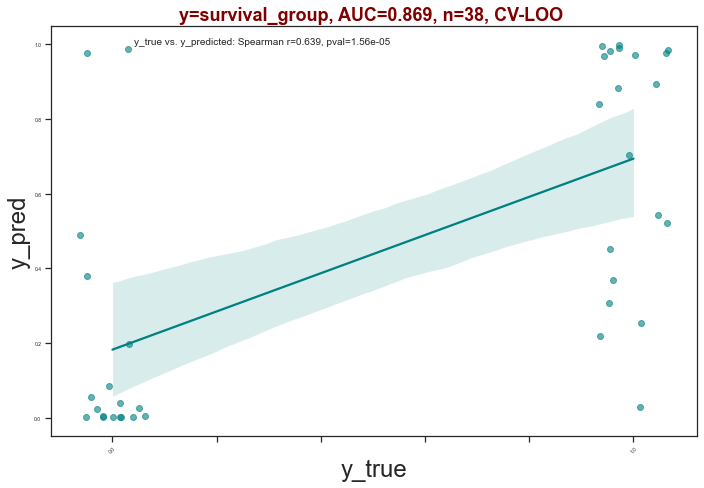

In [113]:
pathigMigg = os.path.join(rootpath,"HA_NA_IgG_IgM")
df_ha_na_igm_igG = rt.readInputFiles(pathigMigg,"log_tranformed_data_RAPA3_HA_NA_IgG_IgM.xlsx")
df_ha_na_igm_igG = rt.get_standardised_df(df_ha_na_igm_igG)


x_cols_list = rt.DataTools.list_removeItemIfExists(list(df_ha_na_igm_igG.columns),outcome)
len(x_cols_list)
#LogisticRegression(random_state=0,penalty="elasticnet",fit_intercept =True,solver="saga",l1_ratio = 0.5)

X_train, X_test, y_train, y_test = train_test_split(df_ha_na_igm_igG[x_cols_list], df_ha_na_igm_igG[outcome], test_size=0.30, random_state=1)
no_of_features = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,180,210,
                  240,270,300,330,360,390,420,450,460]
l1 = 0.01
l2 = 0.03
no_of_feature_with_auc_dict_igM_igG = dict.fromkeys(no_of_features)

final_res_auc_igM_igg = pd.DataFrame(columns=["Auc","FPR","TPR"],index = no_of_features)
    
final_res_auc_igM_igg.index.set_names('Sigfeatures')
glmoutputpath = os.path.join(pathigMigg,"NoteBookOutput")

for num_features in no_of_features:
    
    feature_names = get_important_feature(X_train,y_train,num_features)


    #remove the outcome column dataframe 
    x_cols_list = rt.DataTools.list_removeItemIfExists(list(feature_names),outcome)
    resdict = rt.glm.glm_LOO(glmoutputpath, df_ha_na_igm_igG, y_col_name=outcome, x_cols_list = x_cols_list, model_name = "GLM_shaprio_HANA_igG_IgM_0.01_0.03_FS_{}".format(len(x_cols_list)), 
                                  heatmap_figsize=(30,20), bar_figsize=(50,25),
                                   alpha=l1, L1_wt=l2, heatmap_annotate_text=True, logistic=True)

    no_of_feature_with_auc_dict_igM_igG.update({num_features:resdict})

#write the all the auc details to a excel sheet

for feature_num in no_of_feature_with_auc_dict_igM_igG.keys():
    final_res_auc_igM_igg.at[feature_num,"Auc"] = no_of_feature_with_auc_dict_igM_igG[feature_num]['roc_auc_info']['auc']
    final_res_auc_igM_igg.at[feature_num,"FPR"] = no_of_feature_with_auc_dict_igM_igG[feature_num]['roc_auc_info']['rates']['false positive rate']
    final_res_auc_igM_igg.at[feature_num,"TPR"] = no_of_feature_with_auc_dict_igM_igG[feature_num]['roc_auc_info']['rates']['true positive rate']

rt.writeOutputFile(pathigMigg,"RoC_AUC_for_different_features_by_importanc.xlsx",final_res_auc_igM_igg,write_index = True)


# check for ha and na igg seperately with different feature importance and l1 and l2 weights 

114

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], dtype='int64', name='Sigfeatures')

Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardize

D:\PhD-Tomer\Tools_and_Libraries\LielTools\GLM_functions.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?
Have you standardized data before function call?


KeyboardInterrupt: 

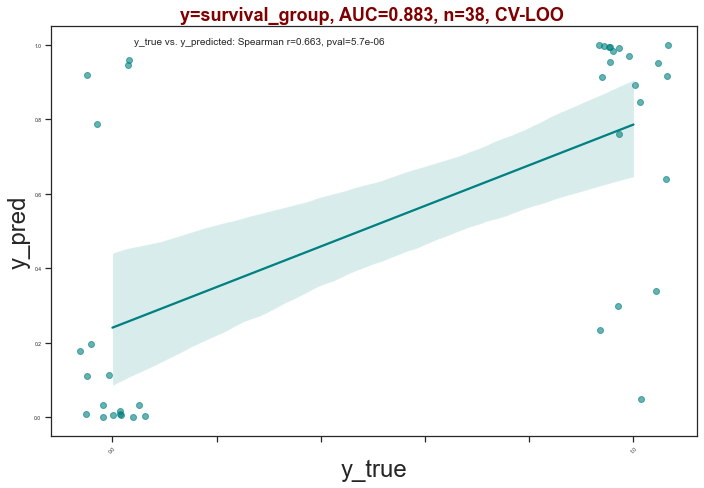

In [116]:
pathaigg = os.path.join(rootpath,"HA_IgG")
df_ha_igG = rt.readInputFiles(pathaigg,"GLM_HA_IgG_ShaprioTest_Live_Dead.xlsx")
df_ha_igG = rt.get_standardised_df(df_ha_igG)


x_cols_list = rt.DataTools.list_removeItemIfExists(list(df_ha_igG.columns),outcome)
len(x_cols_list)
#LogisticRegression(random_state=0,penalty="elasticnet",fit_intercept =True,solver="saga",l1_ratio = 0.5)

X_train, X_test, y_train, y_test = train_test_split(df_ha_igG[x_cols_list], df_ha_igG[outcome], test_size=0.30, random_state=1)
no_of_features = [10,20,30,40,50,60,70,80,90,100,110]
l1 = 0.01
l2 = 0.03
no_of_feature_with_auc_dict_ha_igG = dict.fromkeys(no_of_features)

final_res_auc_ha_igg = pd.DataFrame(columns=["Auc","FPR","TPR"],index = no_of_features)
    
final_res_auc_ha_igg.index.set_names('Sigfeatures')
glmoutputpath = os.path.join(pathaigg,"NoteBookOutput")

for num_features in no_of_features:
    
    feature_names = get_important_feature(X_train,y_train,num_features)

    #remove the outcome column dataframe 
    x_cols_list = rt.DataTools.list_removeItemIfExists(list(feature_names),outcome)
    resdict = rt.glm.glm_LOO(glmoutputpath, df_ha_igG, y_col_name=outcome, x_cols_list = x_cols_list, model_name = "GLM_shaprio_HA_igG_IgG_0.01_0.03_FS_{}".format(len(x_cols_list)), 
                                  heatmap_figsize=(30,20), bar_figsize=(50,25),
                                   alpha=l1, L1_wt=l2, heatmap_annotate_text=True, logistic=True)

    no_of_feature_with_auc_dict_ha_igG.update({num_features:resdict})

#write the all the auc details to a excel sheet

for feature_num in no_of_feature_with_auc_dict_ha_igG.keys():
    final_res_auc_ha_igg.at[feature_num,"Auc"] = no_of_feature_with_auc_dict_ha_igG[feature_num]['roc_auc_info']['auc']
    final_res_auc_ha_igg.at[feature_num,"FPR"] = no_of_feature_with_auc_dict_ha_igG[feature_num]['roc_auc_info']['rates']['false positive rate']
    final_res_auc_ha_igg.at[feature_num,"TPR"] = no_of_feature_with_auc_dict_ha_igG[feature_num]['roc_auc_info']['rates']['true positive rate']

rt.writeOutputFile(pathaigg,"RoC_AUC_for_different_features_by_importanc.xlsx",final_res_auc_ha_igg,write_index = True)
